In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import pymc3 as pm

import matplotlib.pyplot as plt

In [3]:
datafile = "location_data_hw9_2018.csv"

In [4]:
df = pd.read_csv(datafile)

In [5]:
df.head()

,t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
0,1.718397,1.330174,0.993564,1.081700,-1.295918
1,2.998056,1.310404,1.012772,1.004997,-1.254394
2,6.015073,1.270312,1.028386,1.113696,-1.321257
3,8.267651,1.331131,0.948223,1.001845,-1.285209
4,9.279321,1.346159,0.963485,1.113008,-1.261147


In [7]:
df.head()

,t,red_pos_X,red_pos_Y,blue_pos_X,blue_pos_Y
0,1.718397,1.330174,0.993564,1.081700,-1.295918
1,2.998056,1.310404,1.012772,1.004997,-1.254394
2,6.015073,1.270312,1.028386,1.113696,-1.321257
3,8.267651,1.331131,0.948223,1.001845,-1.285209
4,9.279321,1.346159,0.963485,1.113008,-1.261147


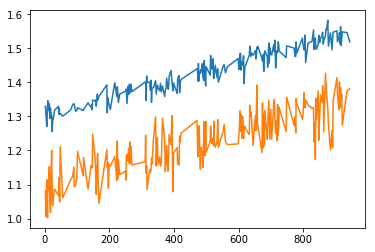

In [12]:
plt.plot(df.t, df.red_pos_X)
plt.plot(df.t, df.blue_pos_X)

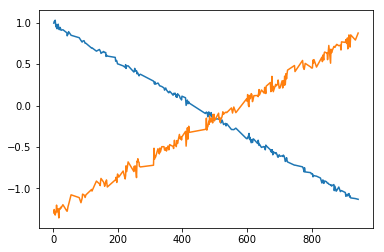

In [13]:
plt.plot(df.t, df.red_pos_Y)
plt.plot(df.t, df.blue_pos_Y)

In [26]:
def do_glm(formula, df):
    with pm.Model() as model:
        pm.glm.GLM.from_formula(formula, df)
        trace = pm.sample(3000, tune=2000) # default tune of 500 was producing a warning so I upped it
        return trace
    
def plot_trace(trace):
    pm.plot_posterior(trace,label='posterior predictive regression lines',round_to=6)
    pm.traceplot(trace[100:])

### Approach:

Estimate separate Vx and Vy components in the original coordiantes, since we need them for later parts.

In [15]:
redx_trace = do_glm("red_pos_X ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:22<00:00, 219.76it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.302358,0.002774,5.223424e-05,1.296836,1.307854,3202.841334,0.999856
t,0.000258,0.000005,9.373762e-08,0.000249,0.000268,3238.876585,0.999833
sd,0.021347,0.000990,1.403978e-05,0.019440,0.023322,4305.657175,0.999839


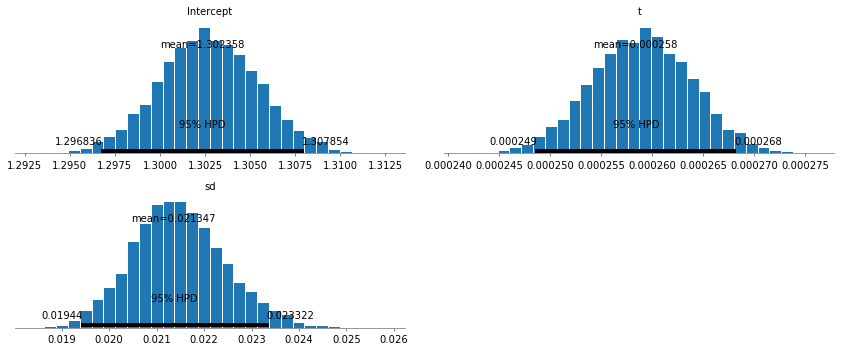

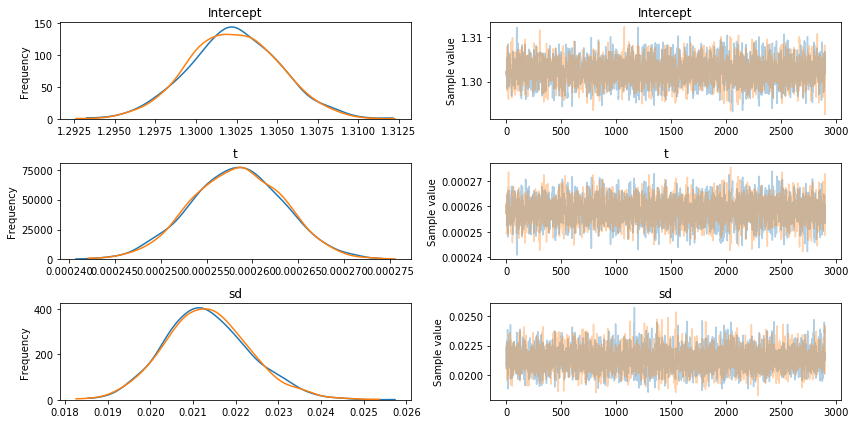

In [28]:
plot_trace(redx_trace)
rx_post = pm.summary(redx_trace)
rx_post

In [17]:
redy_trace = do_glm("red_pos_Y ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:31<00:00, 157.13it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.981887,0.002576,4.706786e-05,0.976789,0.986955,2704.949196,1.001372
t,-0.002263,0.000005,8.594514e-08,-0.002272,-0.002254,2994.858494,1.001934
sd,0.019257,0.000900,1.519155e-05,0.017380,0.020939,3730.888163,1.000283


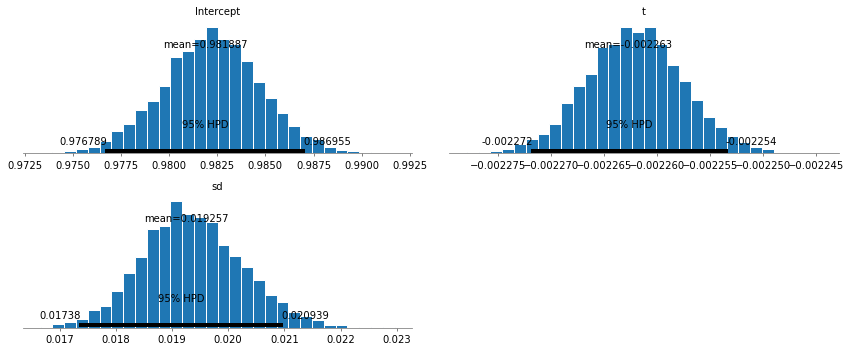

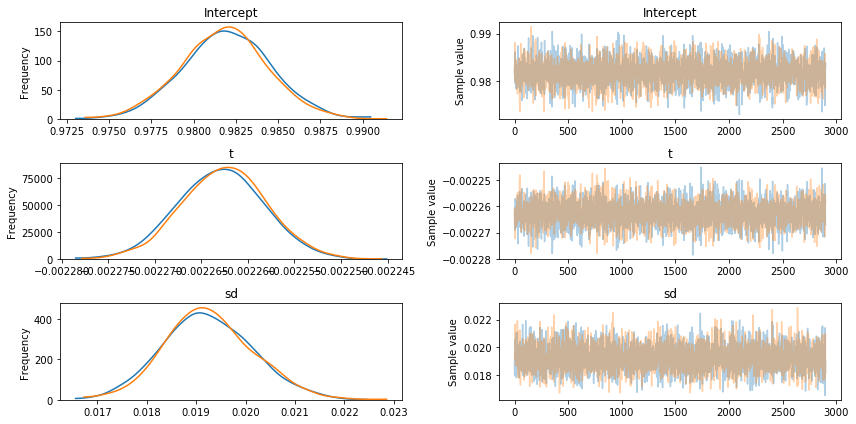

In [29]:
plot_trace(redy_trace)
ry_post = pm.summary(redy_trace)
ry_post

In [19]:
bluex_trace = do_glm("blue_pos_X ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:22<00:00, 218.26it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,1.093369,0.006438,1.137989e-04,1.080538,1.105451,3273.936638,0.999904
t,0.000271,0.000011,2.036499e-07,0.000249,0.000294,3306.959685,0.999834
sd,0.048345,0.002193,3.031268e-05,0.044287,0.052739,4650.546976,1.000049


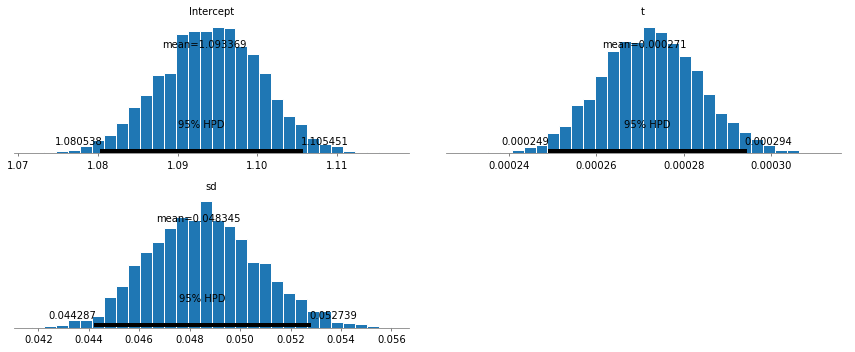

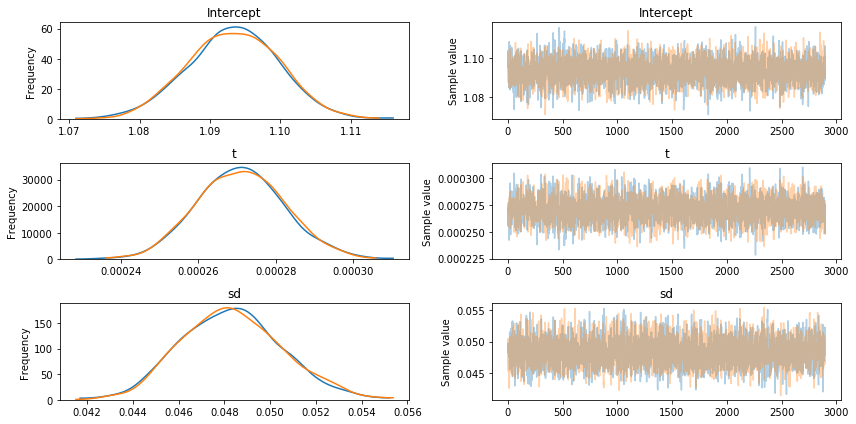

In [30]:
plot_trace(bluex_trace)
bx_post = pm.summary(bluex_trace)
bx_post

In [21]:
bluey_trace = do_glm("blue_pos_Y ~ t", df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, t, Intercept]
100%|██████████| 5000/5000 [00:38<00:00, 128.99it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-1.304337,0.006296,1.010521e-04,-1.316326,-1.292074,3087.379324,1.000011
t,0.002270,0.000011,1.893680e-07,0.002248,0.002292,3024.306282,0.999976
sd,0.048359,0.002267,3.349587e-05,0.044077,0.052927,4091.844917,1.000039


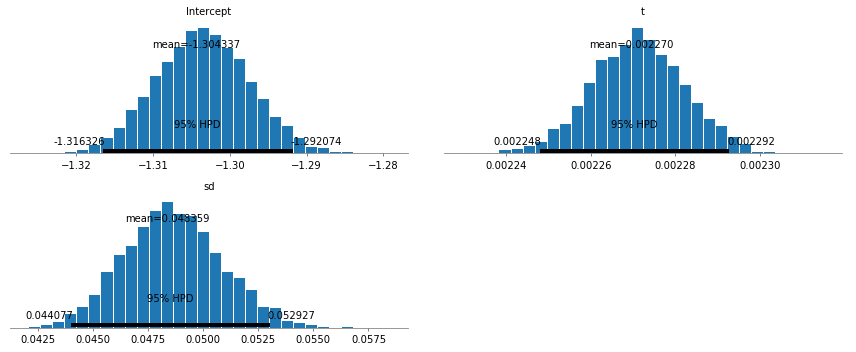

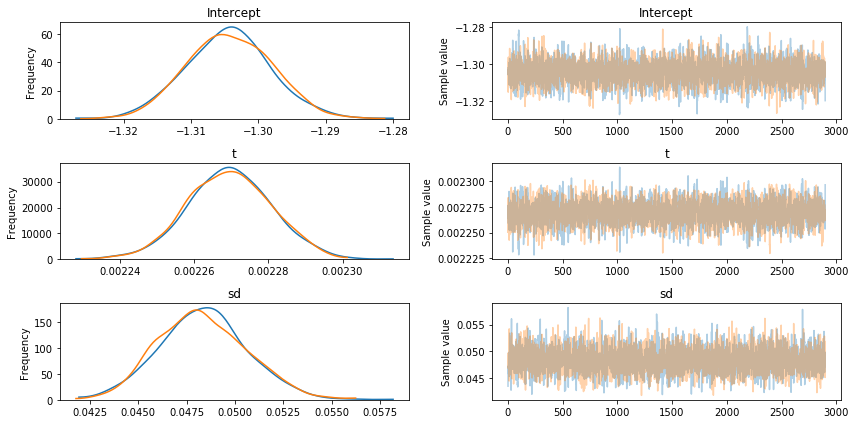

In [31]:
plot_trace(bluey_trace)
by_post = pm.summary(bluey_trace)
by_post

### Answer to part A

Now we have the individual x and y components of each velocity, and we have it all expressed in the original coordinates, which will help with parts B and C. To answer A, though, we do this:

**red velocity**

= sqrt(red_vx^2 + red_vy^2)

In [35]:
np.sqrt(rx_post['mean']['t']**2 + ry_post['mean']['t']**2)

0.0022773805279964056

**blue velocity**

In [36]:
np.sqrt(bx_post['mean']['t']**2 + by_post['mean']['t']**2)

0.0022856647920648917

### Approach to part B

We want to find some t where two conditions are true, one on each of the object's positions.